### [Imports](#imports)  
### [Chargement du dataframe](#loading)    
### [Chargement du tableau des scores](#score)    
### [Fonction de pré-traitement du jeu de données](#pre-traitement)  
### [Lémmatisation](#lemmatisation)  
### [Stemming](#stemming)
### [Séparation jeu d'entraînement, test et validation](#train_test)
### [Réseau de neuronnes de base sans embeddings](#base)   
### [Réseau de neuronnes LSTM avec couche d'embedding GLOVE Lemmatized](#lstm_glove_lem)  
### [Réseau de neuronnes de base avec couche d'embedding GLOVE Lemmatized](#base_glove_lem)  
### [Réseau de neuronnes de base avec couche d'embedding FAST-TEXT Lemmatized](#base_fast_text_lem)  
### [Réseau de neuronnes LSTM avec couche d'embedding FAST-TEXT Lemmatized](#lstm_fast_text_lem)  
### [Résultats tableau des scores](#result_tableau)  
### [Conclusion](#conclusion)

 # <center><a id='imports'>Imports</a></center>

In [1]:
# Functions notebook
from functions.functions import *

c:\Users\romai\anaconda3\envs\P07\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# <center><a id='loading'>Chargement du dataframe</a></center>

In [2]:
data = pd.read_csv("csv/data_40000.csv")

In [3]:
# data = pd.read_csv("csv/data.csv")

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">

</div>

 # <center><a id='score'>Chargement du tableau des scores</a></center>

In [4]:
tableau_score = pd.read_csv("csv/tableau_score.csv")
# nltk.download('wordnet')

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">

</div>

 # <center><a id='pre-traitement'>Fonction de pré-traitement du jeu de données</a></center>

In [5]:
data["cleaned_tweet"] = data["tweet"]

In [6]:
data["cleaned_tweet"] = data["cleaned_tweet"].apply(lambda x: clean_text(x))

In [7]:
data["cleaned_tweet"]

0                                       the poor spartans 
1        lol so how is everyone and btw i have to go to...
2         laura thompson no cause i hate beer i love fr...
3        at home really thinking about my lifes path i ...
4        so tired of being unemployed last few jobs wer...
                               ...                        
39995    th update right now i really do have a better ...
39996     wanting to watch twilight again but i m going...
39997    out to breakfast andd car shopping with my dad...
39998    just set up my twitter page the ball has start...
39999                                        comeagainjen 
Name: cleaned_tweet, Length: 40000, dtype: object

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">

</div>

# <center><a id='lemmatisation'>Lémmatisation</a></center>

In [8]:
data["lemmatized_tweet"] = data["cleaned_tweet"].apply(lambda x: clean_text(x))

In [9]:
data["lemmatized_tweet"] = data["lemmatized_tweet"].apply(lambda x: tokenize_tweet(x))

In [10]:
data['lemmatized_tweet'] = lemm_corpus(data["lemmatized_tweet"])

In [11]:
data['lemmatized_tweet'] 

0                                         the poor spartan
1        lol so how is everyone and btw i have to go to...
2        laura thompson no cause i hate beer i love fra...
3        at home really thinking about my life path i a...
4        so tired of being unemployed last few job were...
                               ...                        
39995    th update right now i really do have a better ...
39996    wanting to watch twilight again but i m going ...
39997    out to breakfast andd car shopping with my dad...
39998    just set up my twitter page the ball ha starte...
39999                                         comeagainjen
Name: lemmatized_tweet, Length: 40000, dtype: object

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">

</div>

# <center><a id='stemming'>Stemming</a></center>

In [12]:
data["stemmed_tweet"] = data["cleaned_tweet"].apply(lambda x: clean_text(x))

In [13]:
data["stemmed_tweet"] = data["stemmed_tweet"].apply(lambda x: tokenize_tweet(x))

In [14]:
data['stemmed_tweet'] = stem_corpus(data["stemmed_tweet"])

In [15]:
data['stemmed_tweet'] 

0                                         the poor spartan
1        lol so how is everyon and btw i have to go to ...
2        laura thompson no caus i hate beer i love fram...
3        at home realli think about my life path i am i...
4        so tire of be unemploy last few job were so va...
                               ...                        
39995    th updat right now i realli do have a better u...
39996    want to watch twilight again but i m go to the...
39997    out to breakfast andd car shop with my daddddi...
39998    just set up my twitter page the ball ha start ...
39999                                         comeagainjen
Name: stemmed_tweet, Length: 40000, dtype: object

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">

</div>

# <center><a id='train_test'>Séparation jeu d'entraînement, test et validation</a></center>

In [16]:
X = data["lemmatized_tweet"]
y = data["target"]
X_train, X_test, X_val, y_train, y_test, y_val = train_test_val_split(X, y)

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">

</div>

# <center><a id='base'>Réseau de neuronnes de base sans embeddings</a></center>

In [17]:
maxlen = 50 # 300
ebd_dim = 300
path = 'glove.6B.300d.txt'

tokenizer = Tokenizer()

In [18]:
X_train_padded, X_test_padded, X_val_padded, vocab_size, word_index = sequence_of_dataframe(tokenizer, X_train, X_test, X_val, maxlen)

In [19]:
embedding_matrix_glove = ebd_matrix_glove(tokenizer, len(tokenizer.word_counts), ebd_dim, path)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         9002400   
                                                                 
 dense (Dense)               (None, None, 32)          9632      
                                                                 
 dropout (Dropout)           (None, None, 32)          0         
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                        

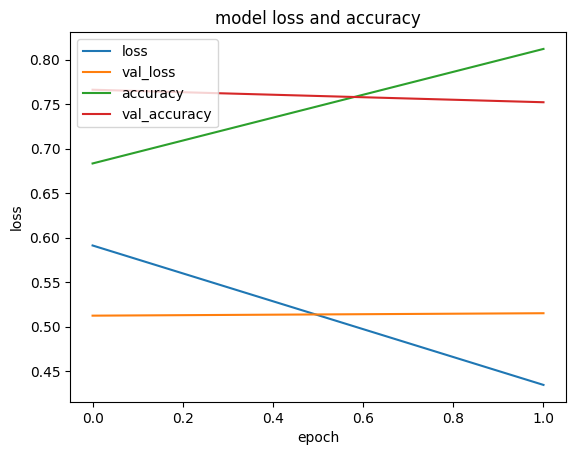

c:\Users\romai\Desktop\OC_Romain_Vairo\P7_VAIRO_ROMAIN\functions\functions.py:398: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tableau_score = tableau_score.append(pd.Series(list, index = ["Nom du modèle", "Temps d'entraînement", "AUC-score_test", "AUC-score_val",


In [20]:
model, pred_test, time_training, tableau_score, history = all_models_generator("Modele de base sans embedding Lemmatized", "BASE", Embedding(vocab_size, ebd_dim), 2, 64, tableau_score, X_train_padded, X_test_padded, X_val_padded, y_train, y_test, y_val)

250/250 [==============================] - 1s 2ms/step
Aléatoire: ROC AUC= 0.500
Modele de base sans embedding LemmatizedROC AUC= 0.754


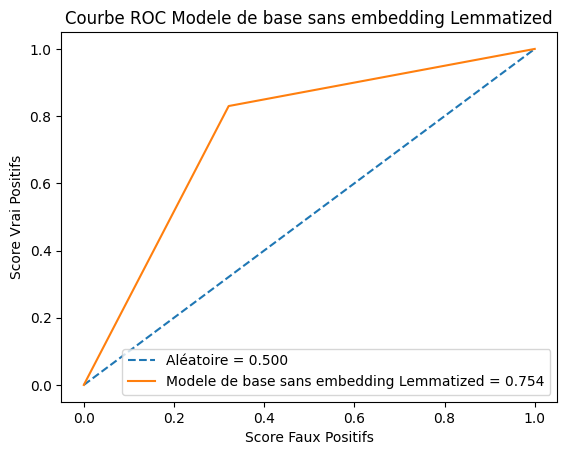

In [21]:
graph_courbe_roc(model, X_test_padded, y_test, "Modele de base sans embedding Lemmatized")

              precision    recall  f1-score   support

           0       0.80      0.68      0.73      4000
           1       0.72      0.83      0.77      4000

    accuracy                           0.75      8000
   macro avg       0.76      0.75      0.75      8000
weighted avg       0.76      0.75      0.75      8000



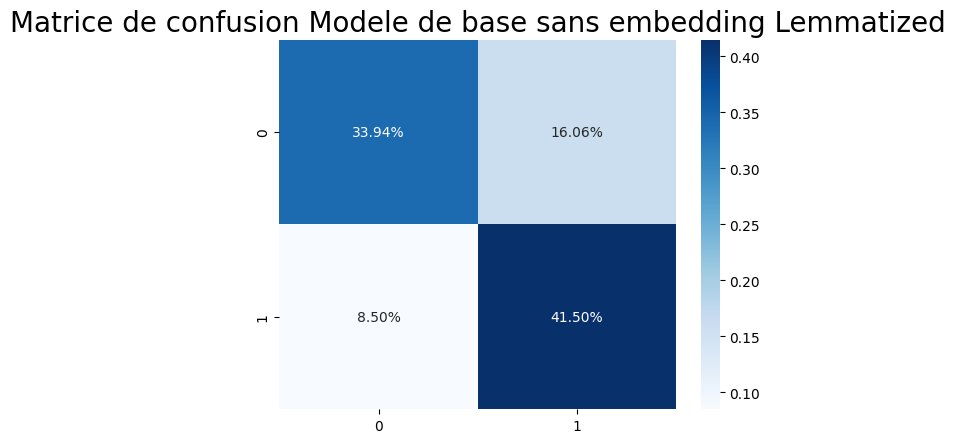

In [22]:
confusion_report_matrix("Matrice de confusion Modele de base sans embedding Lemmatized", y_test, pred_test)

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">

</div>

# <center><a id='lstm_glove_lem'>Réseau de neuronnes LSTM avec couche d'embedding GLOVE Lemmatized</a></center>

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 300)         9002400   
                                                                 
 dense_2 (Dense)             (None, None, 200)         60200     
                                                                 
 dropout_2 (Dropout)         (None, None, 200)         0         
                                                                 
 bidirectional (Bidirectiona  (None, None, 200)        240800    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 200)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_3 (Dropout)         (None, 200)              

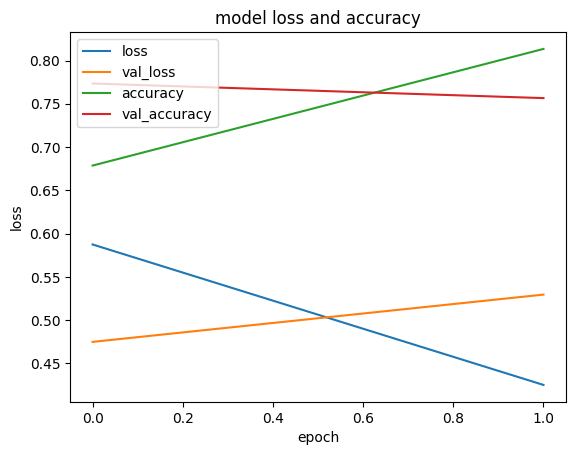

c:\Users\romai\Desktop\OC_Romain_Vairo\P7_VAIRO_ROMAIN\functions\functions.py:398: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tableau_score = tableau_score.append(pd.Series(list, index = ["Nom du modèle", "Temps d'entraînement", "AUC-score_test", "AUC-score_val",


In [23]:
model, pred_test, time_training, tableau_score, history = all_models_generator("Modele LSTM avec Embedding GLOVE Lemmatized", "LSTM", Embedding(vocab_size, ebd_dim, weights=[embedding_matrix_glove]), 2, 32, tableau_score, X_train_padded, X_test_padded, X_val_padded, y_train, y_test, y_val)

250/250 [==============================] - 5s 20ms/step
Aléatoire: ROC AUC= 0.500
Modele LSTM avec Embedding GLOVE LemmatizedROC AUC= 0.752


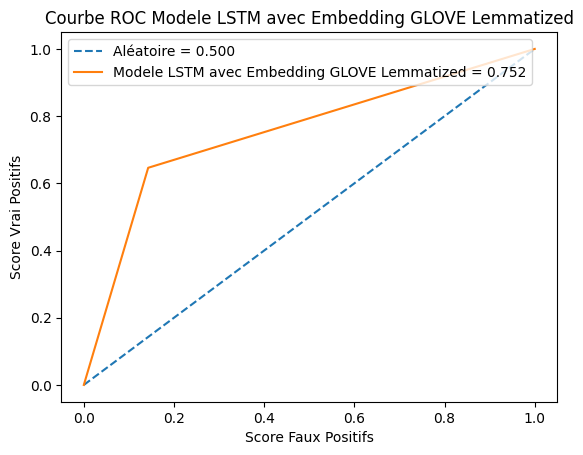

In [24]:
graph_courbe_roc(model, X_test_padded, y_test, "Modele LSTM avec Embedding GLOVE Lemmatized")

              precision    recall  f1-score   support

           0       0.71      0.86      0.78      4000
           1       0.82      0.65      0.72      4000

    accuracy                           0.75      8000
   macro avg       0.76      0.75      0.75      8000
weighted avg       0.76      0.75      0.75      8000



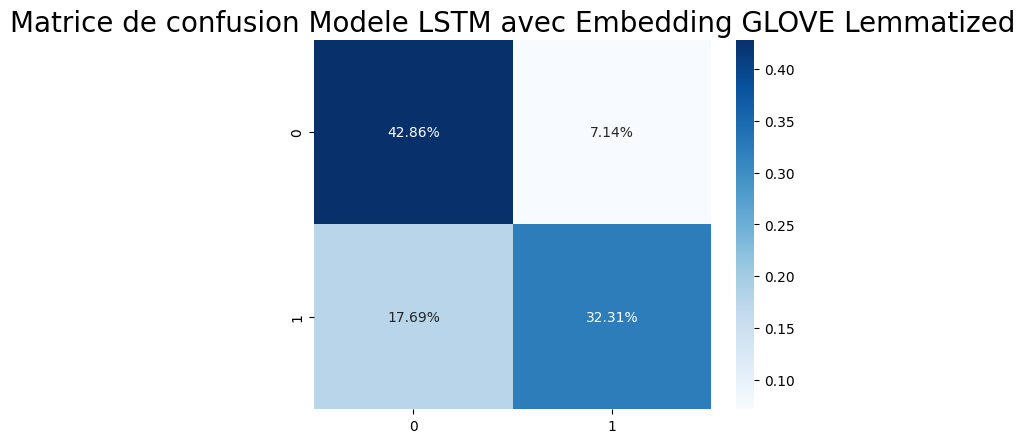

In [25]:
confusion_report_matrix("Matrice de confusion Modele LSTM avec Embedding GLOVE Lemmatized", y_test, pred_test)

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">

</div>

# <center><a id='base_glove_lem'>Réseau de neuronnes de base avec couche d'embedding GLOVE Lemmatized</a></center>

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 300)         9002400   
                                                                 
 dense_7 (Dense)             (None, None, 128)         38528     
                                                                 
 dropout_7 (Dropout)         (None, None, 128)         0         
                                                                 
 global_average_pooling1d_2   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                      

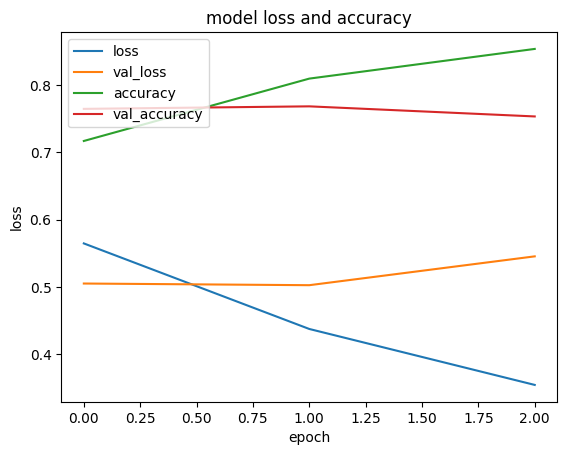

c:\Users\romai\Desktop\OC_Romain_Vairo\P7_VAIRO_ROMAIN\functions\functions.py:398: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tableau_score = tableau_score.append(pd.Series(list, index = ["Nom du modèle", "Temps d'entraînement", "AUC-score_test", "AUC-score_val",


In [27]:
model, pred_test, time_training, tableau_score, history = all_models_generator("Modele de base avec embedding GLOVE Lemmatized", "BASE_EMB", Embedding(vocab_size, ebd_dim, weights=[embedding_matrix_glove]), 3, 64, tableau_score, X_train_padded, X_test_padded, X_val_padded, y_train, y_test, y_val)

250/250 [==============================] - 1s 3ms/step
Aléatoire: ROC AUC= 0.500
Modele de base avec embedding GLOVE LemmatizedROC AUC= 0.760


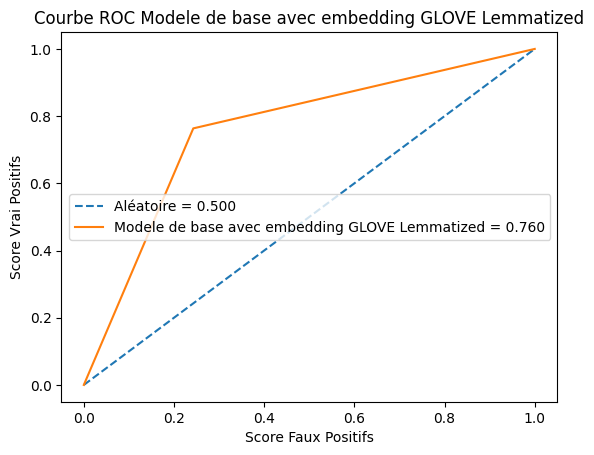

In [28]:
graph_courbe_roc(model, X_test_padded, y_test, "Modele de base avec embedding GLOVE Lemmatized")

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      4000
           1       0.76      0.76      0.76      4000

    accuracy                           0.76      8000
   macro avg       0.76      0.76      0.76      8000
weighted avg       0.76      0.76      0.76      8000



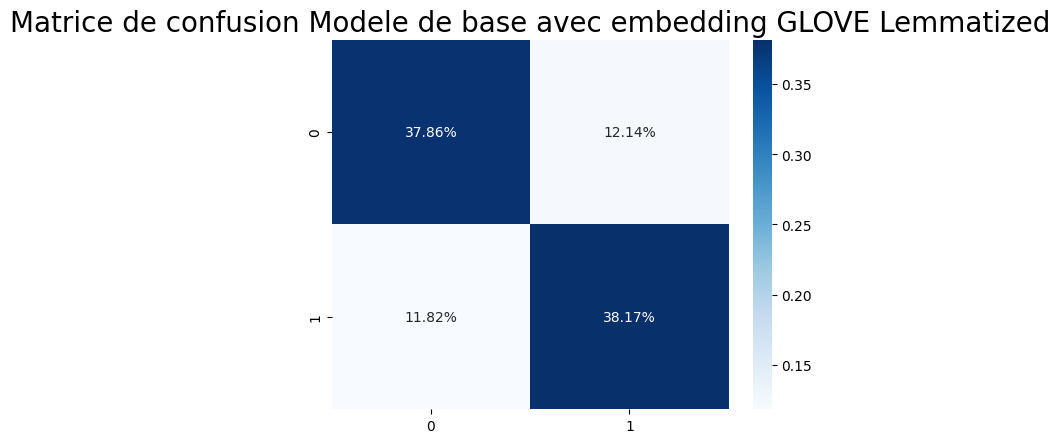

In [29]:
confusion_report_matrix("Matrice de confusion Modele de base avec embedding GLOVE Lemmatized", y_test, pred_test)

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">

</div>

# <center><a id='base_fast_text_lem'>Réseau de neuronnes de base avec couche d'embedding FAST-TEXT Lemmatized</a></center>

In [30]:
import gensim.downloader as api
fast_text = api.load("fasttext-wiki-news-subwords-300")
tokenizer = Tokenizer()

In [31]:
X_train_padded, X_test_padded, X_val_padded, vocab_size, word_index = sequence_of_dataframe(tokenizer, X_train, X_test, X_val, maxlen)

In [32]:
embedding_matrix_fasttext = ebd_matrix_fast_text(tokenizer, len(tokenizer.word_counts), ebd_dim, fast_text)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 300)         9002400   
                                                                 
 dense_11 (Dense)            (None, None, 128)         38528     
                                                                 
 dropout_11 (Dropout)        (None, None, 128)         0         
                                                                 
 global_average_pooling1d_4   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                      

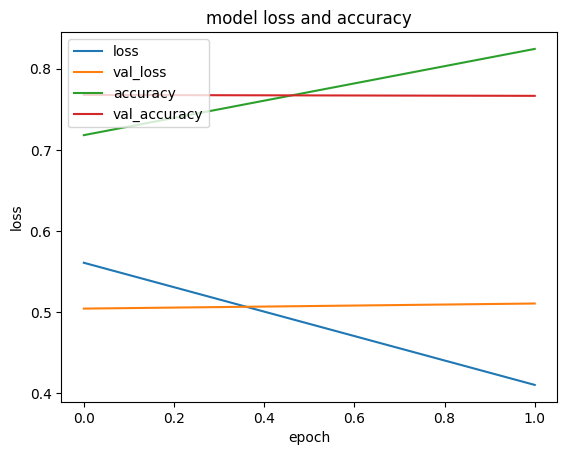

c:\Users\romai\Desktop\OC_Romain_Vairo\P7_VAIRO_ROMAIN\functions\functions.py:398: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tableau_score = tableau_score.append(pd.Series(list, index = ["Nom du modèle", "Temps d'entraînement", "AUC-score_test", "AUC-score_val",


In [34]:
model, pred_test, time_training, tableau_score, history = all_models_generator("Modele de base avec Embedding FAST TEXT Lemmatized", "BASE_EMB", Embedding(vocab_size, ebd_dim, weights=[embedding_matrix_fasttext]), 2, 64, tableau_score, X_train_padded, X_test_padded, X_val_padded, y_train, y_test, y_val)

250/250 [==============================] - 1s 3ms/step
Aléatoire: ROC AUC= 0.500
Modele de base avec Embedding FAST TEXT LemmatizedROC AUC= 0.765


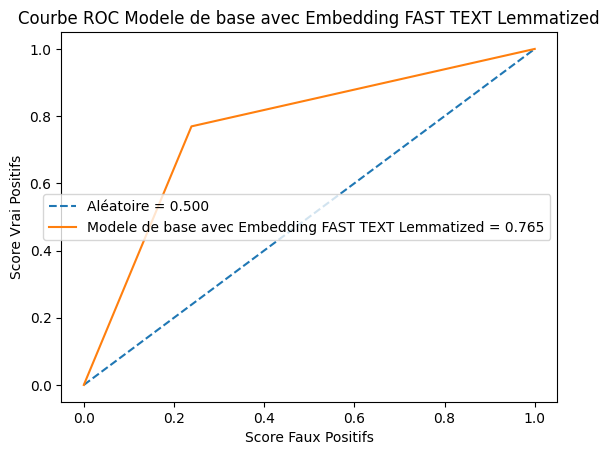

In [35]:
graph_courbe_roc(model, X_test_padded, y_test, "Modele de base avec Embedding FAST TEXT Lemmatized")

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      4000
           1       0.76      0.77      0.77      4000

    accuracy                           0.77      8000
   macro avg       0.77      0.77      0.77      8000
weighted avg       0.77      0.77      0.77      8000



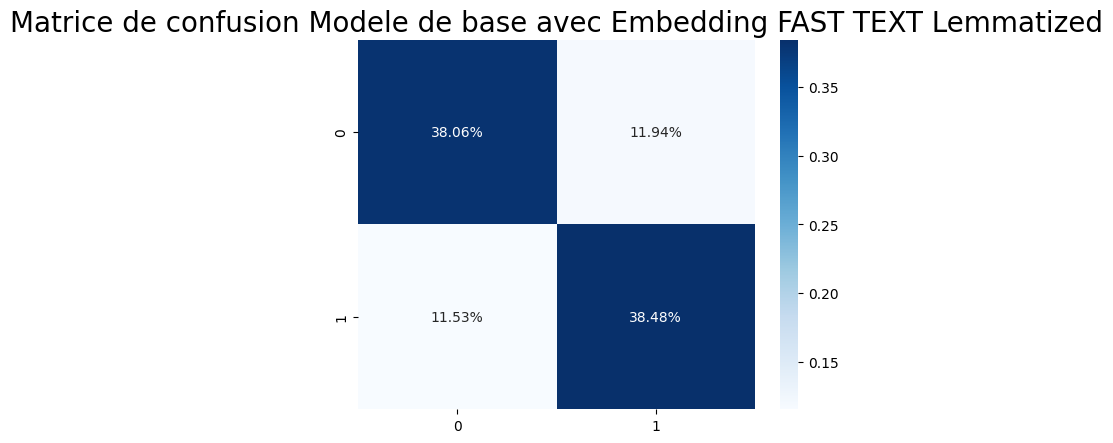

In [36]:
confusion_report_matrix("Matrice de confusion Modele de base avec Embedding FAST TEXT Lemmatized", y_test, pred_test)

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">

</div>

# <center><a id='lstm_fast_text_lem'>Réseau de neuronnes LSTM avec couche d'embedding FAST-TEXT Lemmatized</a></center>

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 300)         9002400   
                                                                 
 dense_16 (Dense)            (None, None, 200)         60200     
                                                                 
 dropout_16 (Dropout)        (None, None, 200)         0         
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 200)        240800    
 nal)                                                            
                                                                 
 global_max_pooling1d_2 (Glo  (None, 200)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_17 (Dropout)        (None, 200)              

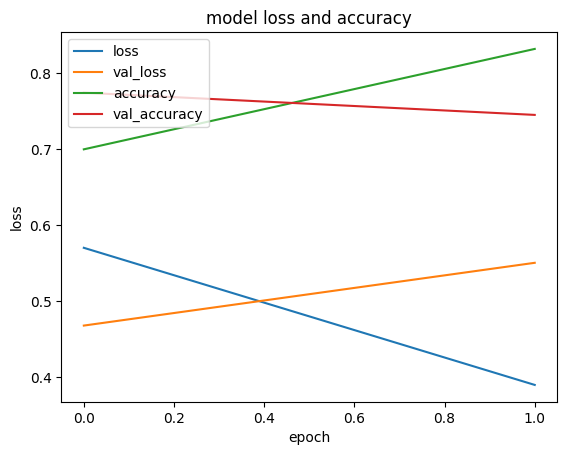

c:\Users\romai\Desktop\OC_Romain_Vairo\P7_VAIRO_ROMAIN\functions\functions.py:398: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tableau_score = tableau_score.append(pd.Series(list, index = ["Nom du modèle", "Temps d'entraînement", "AUC-score_test", "AUC-score_val",


In [38]:
model, pred_test, time_training, tableau_score, history = all_models_generator("Modele LSTM avec Embedding FAST TEXT Lemmatized", "LSTM", Embedding(vocab_size, ebd_dim, weights=[embedding_matrix_fasttext]), 2, 64, tableau_score, X_train_padded, X_test_padded, X_val_padded, y_train, y_test, y_val)

250/250 [==============================] - 5s 19ms/step
Aléatoire: ROC AUC= 0.500
Modele LSTM avec Embedding FAST TEXT LemmatizedROC AUC= 0.746


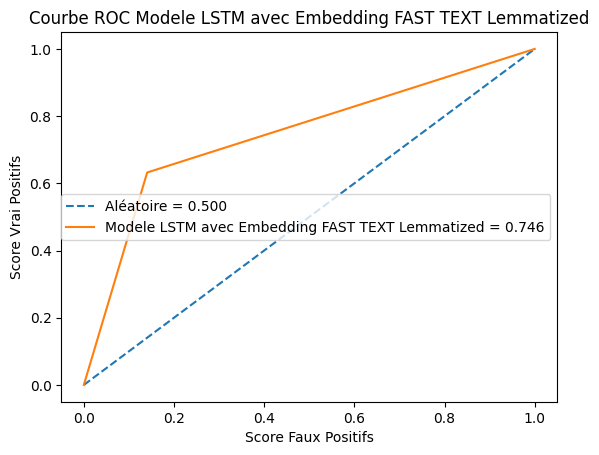

In [39]:
graph_courbe_roc(model, X_test_padded, y_test, "Modele LSTM avec Embedding FAST TEXT Lemmatized")

              precision    recall  f1-score   support

           0       0.70      0.86      0.77      4000
           1       0.82      0.63      0.71      4000

    accuracy                           0.75      8000
   macro avg       0.76      0.75      0.74      8000
weighted avg       0.76      0.75      0.74      8000



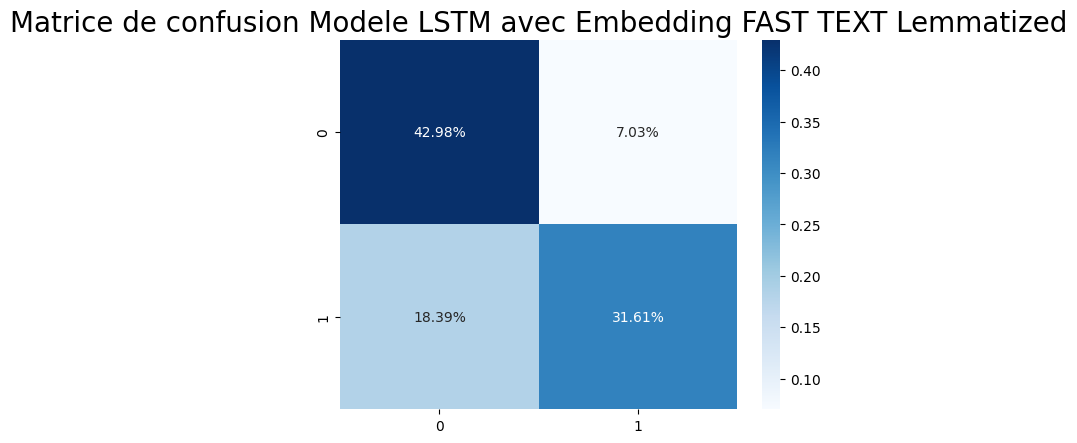

In [40]:
confusion_report_matrix("Matrice de confusion Modele LSTM avec Embedding FAST TEXT Lemmatized", y_test, pred_test)

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">

</div>

# <center><a id='result_tableau'>Résultats tableau des scores</a></center>

In [41]:
tableau_score

,Nom du modèle,Temps d'entraînement,AUC-score_test,AUC-score_val,F1-score_test,F1-score_val,Précision-score_test,Précision-score_val,Rappel-score_test,Rappel-score_val,F-bêta-score_test,F-bêta-score_val,accuracy-score_test,accuracy-score_val
0,Régression Logistique Count Lemmatized,6.736087,0.762875,0.762813,0.762875,0.762813,0.762875,0.762813,0.762875,0.762813,0.762875,0.762813,0.762875,0.762813
1,Régression Logistique Count Stemmed,5.005085,0.761500,0.758594,0.761500,0.758594,0.761500,0.758594,0.761500,0.758594,0.761500,0.758594,0.761500,0.758594
2,Régression Logistique TF-IDF Lemmatized,4.726022,0.769625,0.765625,0.769625,0.765625,0.769625,0.765625,0.769625,0.765625,0.769625,0.765625,0.769625,0.765625
3,Régression Logistique TF-IDF Stemmed,4.360262,0.768375,0.764062,0.768375,0.764063,0.768375,0.764062,0.768375,0.764062,0.768375,0.764062,0.768375,0.764062
4,Modele de base sans embedding Lemmatized,61.427612,0.754375,0.752031,0.754375,0.752031,0.754375,0.752031,0.754375,0.752031,0.754375,0.752031,0.754375,0.752031
5,Modele LSTM avec Embedding GLOVE Lemmatized,214.723315,0.751750,0.756563,0.751750,0.756563,0.751750,0.756563,0.751750,0.756563,0.751750,0.756563,0.751750,0.756563
6,Modele de base avec embedding GLOVE Lemmatized,101.752940,0.760375,0.753125,0.760375,0.753125,0.760375,0.753125,0.760375,0.753125,0.760375,0.753125,0.760375,0.753125
7,Modele de base avec Embedding FAST TEXT Lemmat...,64.724601,0.765375,0.766563,0.765375,0.766563,0.765375,0.766563,0.765375,0.766563,0.765375,0.766563,0.765375,0.766563
8,Modele LSTM avec Embedding FAST TEXT Lemmatized,181.415542,0.745875,0.744844,0.745875,0.744844,0.745875,0.744844,0.745875,0.744844,0.745875,0.744844,0.745875,0.744844


<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">

</div>

# <center><a id='conclusion'>Conclusion</a></center>

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">

</div>